### IMPORTANDO DADOS

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

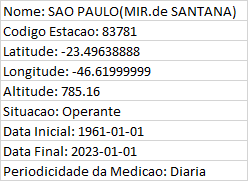

In [11]:
# criando dataframe pandas a partir de dataset baixado
dados = pd.read_csv('..\\dataset\\dados_83781_D_1961-01-01_2023-01-01.csv', sep=';')
dados.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)"
22641,28/12/2022,30.1,27.1,21.90,19.4
22642,29/12/2022,2.2,27.1,22.06,19.2
22643,30/12/2022,11.7,26.7,21.94,19.2
22644,31/12/2022,0.0,27.1,21.78,18.4
22645,01/01/2023,9.1,27.9,22.66,18.0


In [12]:
# retorna informações do df
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22646 entries, 0 to 22645
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data Medicao                              22646 non-null  object 
 1   PRECIPITACAO TOTAL, DIARIO(mm)            22126 non-null  float64
 2   TEMPERATURA MAXIMA, DIARIA(°C)            21872 non-null  float64
 3   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  21811 non-null  float64
 4   TEMPERATURA MINIMA, DIARIA(°C)            21919 non-null  float64
dtypes: float64(4), object(1)
memory usage: 884.7+ KB


### TRATANDO DADOS

In [13]:
# removendo entradas nan
columns = dados.columns
for column in columns:
    dados[column] = dados[column].replace(999.90, np.nan)

dados = dados.dropna()
dados.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)"
22641,28/12/2022,30.1,27.1,21.90,19.4
22642,29/12/2022,2.2,27.1,22.06,19.2
22643,30/12/2022,11.7,26.7,21.94,19.2
22644,31/12/2022,0.0,27.1,21.78,18.4
22645,01/01/2023,9.1,27.9,22.66,18.0


In [14]:
# Corigindo colunas alvo
dados['Data_Medicao'] = pd.to_datetime(dados['Data Medicao'],format='%d/%m/%Y')
dados['TEMP_MAX'] = dados['TEMPERATURA MAXIMA, DIARIA(°C)']
dados['TEMP_MIN'] = dados['TEMPERATURA MINIMA, DIARIA(°C)']
dados.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)",Data_Medicao,TEMP_MAX,TEMP_MIN
22641,28/12/2022,30.1,27.1,21.90,19.4,2022-12-28,27.1,19.4
22642,29/12/2022,2.2,27.1,22.06,19.2,2022-12-29,27.1,19.2
22643,30/12/2022,11.7,26.7,21.94,19.2,2022-12-30,26.7,19.2
22644,31/12/2022,0.0,27.1,21.78,18.4,2022-12-31,27.1,18.4
22645,01/01/2023,9.1,27.9,22.66,18.0,2023-01-01,27.9,18.0


In [15]:
# Filtra as linhas correspondentes ao mês 12 (dezembro)
df_mes = dados[dados['Data_Medicao'].dt.month == 10]
df_mes.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)",Data_Medicao,TEMP_MAX,TEMP_MIN
22579,27/10/2022,0.0,34.1,24.30,17.6,2022-10-27,34.1,17.6
22580,28/10/2022,3.0,30.7,24.38,19.6,2022-10-28,30.7,19.6
22581,29/10/2022,0.0,32.7,23.36,18.2,2022-10-29,32.7,18.2
22582,30/10/2022,15.5,30.0,24.82,17.9,2022-10-30,30.0,17.9
22583,31/10/2022,31.2,25.8,21.28,18.8,2022-10-31,25.8,18.8


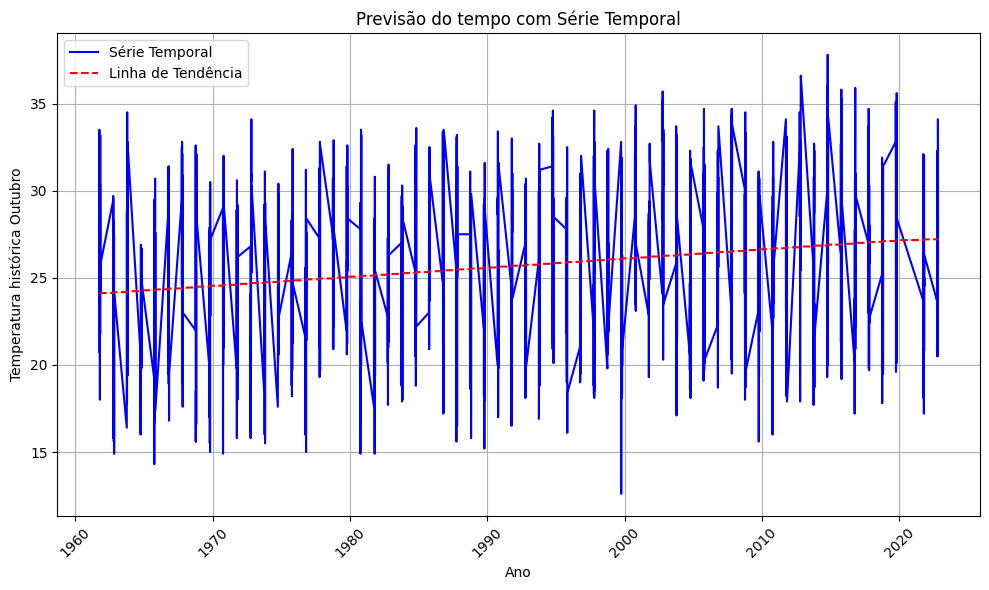

In [32]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Converter a coluna de números inteiros em formato de data
# sp['YEAR'] = pd.to_datetime(sp['YEAR'], format='%Y')

# Ajustar uma linha de tendência (regressão linear) aos dados
x = np.arange(len(df_mes))
y = df_mes['TEMP_MAX']
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)

# Plotar a série temporal
plt.plot(df_mes['Data_Medicao'], df_mes['TEMP_MAX'], label='Série Temporal', color='b')

# Plotar a linha de tendência
plt.plot(df_mes['Data_Medicao'], trend_line(x), label='Linha de Tendência', color='r', linestyle='--')


# Configurar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Temperatura histórica Outubro')
plt.title('Previsão do tempo com Série Temporal')



# Mostrar a legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

### ANALISANDO DADOS

In [18]:
# teste ADCF para verificar a estacionariedade
# a decisão de aceitação da hipótese de estacionariedade se dá estabelecido se o valor (p-value) obtido for menor que 0.05.
#  o valor do teste tem que ser menor que o valor crítico para esse mesmo nível de significância
from statsmodels.tsa.stattools import adfuller

test_estacionariedade = adfuller(df_mes['TEMP_MAX'])
output = pd.Series(test_estacionariedade[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

for key, value in test_estacionariedade[4].items():
  output['Valor crítico(%s)' %key] = value
print(output)

Teste                          -1.645366e+01
p-valor                         2.365531e-29
Lags                            3.000000e+00
Número de observações usadas    1.872000e+03
Valor crítico(1%)              -3.433848e+00
Valor crítico(5%)              -2.863085e+00
Valor crítico(10%)             -2.567593e+00
dtype: float64


In [19]:
print(test_estacionariedade)

(-16.453656550318627, 2.3655306017635624e-29, 3, 1872, {'1%': -3.4338480179204556, '5%': -2.863085177979608, '10%': -2.567592596439203}, 10177.581470548264)


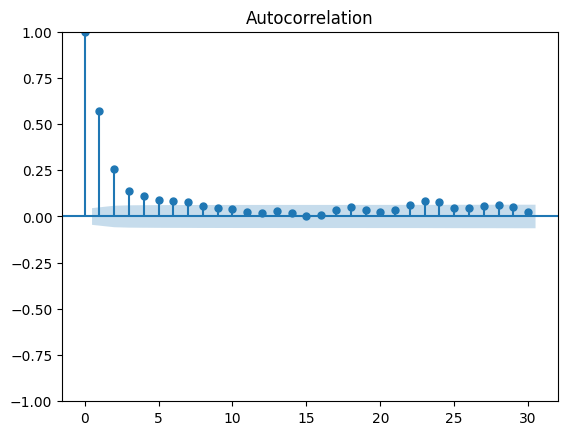

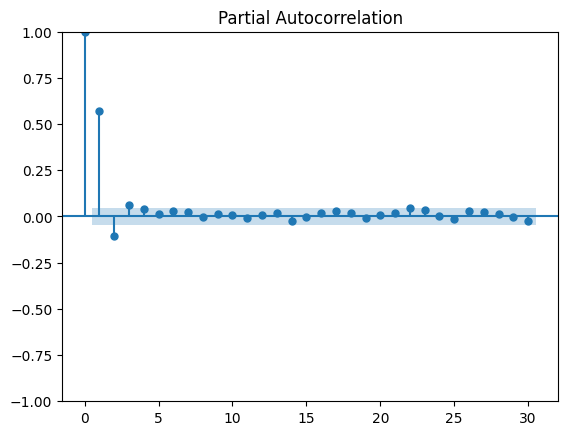

In [20]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Verificando as funções ACF e PACF
#determinando q
acf = plot_acf(df_mes['TEMP_MAX'], lags = 30)
# determinando p
pacf = plot_pacf(df_mes['TEMP_MAX'], lags = 30)

**Quantidade de termos em p**

Ambos os gráficos terão o primeiro pirulito com valor 1. Para saber o quanto de termos AR irá precisar, olhe para o gráfico de ACF e veja se o segundo lollipop caiu exponencialmente. Se caiu, olhe para o gŕafico de PACF e conte quantos pirulitos passam o valor crítico (faixa azulada horizontal) antes de retornarem para dentro da faixa.

**Quantidade de termos em q**

Um processo muito semelhante é feito para saber a quantidade de termos q. Olhe para o gráfico de PACF e veja se o segundo lollipop caiu exponencialmente. Se caiu, olhe para o gŕafico de ACF e conte quantos pirulitos passam o valor crítico (faixa azulada horizontal) antes de retornarem para dentro da faixa.


O modelo ARIMA é composto por três partes:

* Auto regressivo (AR): Yt é modelado por seus valores dos tempos anteriores.

* Integração (I): número de diferenciações para tornar a série estacionária.

* Média Móvel (MA): Yt é modelado com os valores do termo de erro dos tempos anteriores.


* P - Ordem da parte auto-regressiva: número de medições necessárias para se prever a próxima
* q - ordem da média móvel: valor do erro calculado para a medição anterior
* d - grau de diferenciação: número de vezes que ocorrem as transformações (uso de medições)

In [21]:
# treinando modelo ARIMA
import statsmodels.api as sm
# Modelo Arima
model = sm.tsa.arima.ARIMA(df_mes['TEMP_MAX'], order=(3,1,5))
results_AR = model.fit() #ajustando o modelo

c:\Users\gu_gt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gu_gt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gu_gt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gu_gt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
print(results_AR.summary())

                               SARIMAX Results                                
Dep. Variable:               TEMP_MAX   No. Observations:                 1876
Model:                 ARIMA(3, 1, 5)   Log Likelihood               -5152.315
Date:                Wed, 27 Sep 2023   AIC                          10322.630
Time:                        14:06:44   BIC                          10372.457
Sample:                             0   HQIC                         10340.985
                               - 1876                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6543      0.104     -6.292      0.000      -0.858      -0.450
ar.L2         -0.2596      0.123     -2.117      0.034      -0.500      -0.019
ar.L3          0.5149      0.083      6.201      0.0

Box-Ljung , com as seguintes hipóteses:

H0 : Há Ruído Branco, modelo não exibe falha de ajuste.

H1 : Não há Ruído Branco, o modelo exibe falha de ajuste.

Regra de decisão: Quando (p-value) é > 0,05 aceitamos H0 , ou seja, há evidência de que o modelo não exibe falha de ajuste.


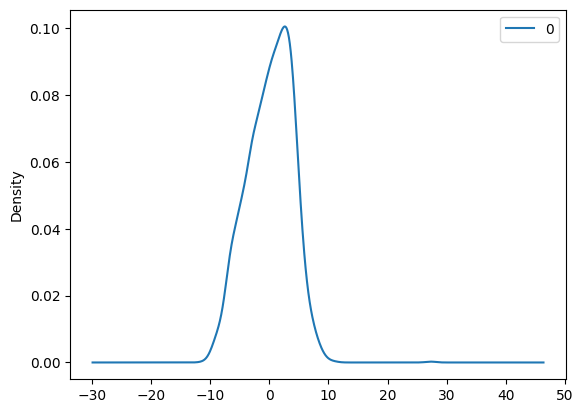

In [23]:
# trazendo os redisuos(erros ao longo do tempo)
from pandas import DataFrame

residuals = DataFrame(results_AR.resid)

residuals.plot(kind='kde') # grafico de densidade: reflete a normalidade dos dados
plt.show()

In [24]:
residuals.describe()

,0
count,1876.000000
mean,0.114752
std,3.829348
min,-10.794211
25%,-2.606194
50%,0.474618
75%,3.040789
max,27.300000


In [26]:
df_mes.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)",Data_Medicao,TEMP_MAX,TEMP_MIN
22579,27/10/2022,0.0,34.1,24.30,17.6,2022-10-27,34.1,17.6
22580,28/10/2022,3.0,30.7,24.38,19.6,2022-10-28,30.7,19.6
22581,29/10/2022,0.0,32.7,23.36,18.2,2022-10-29,32.7,18.2
22582,30/10/2022,15.5,30.0,24.82,17.9,2022-10-30,30.0,17.9
22583,31/10/2022,31.2,25.8,21.28,18.8,2022-10-31,25.8,18.8


### PREVENDO TEMPERATURA

In [27]:
# previsões para 31 períodos futuros futuras
forecast = results_AR.forecast(steps=31)
df = forecast.to_frame()
df = df.reset_index()
df = df.drop('index', axis=1)
df.head()

c:\Users\gu_gt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gu_gt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
0,26.005878
1,26.724627
2,26.612926
3,26.604038
4,26.783750


In [29]:
# Crie a coluna "data" com valores a partir de "01/02/2023"
df['data'] = pd.date_range(start='2023-10-01', periods=31, freq='D')
df.head()

,predicted_mean,data
0,26.005878,2023-10-01
1,26.724627,2023-10-02
2,26.612926,2023-10-03
3,26.604038,2023-10-04
4,26.783750,2023-10-05


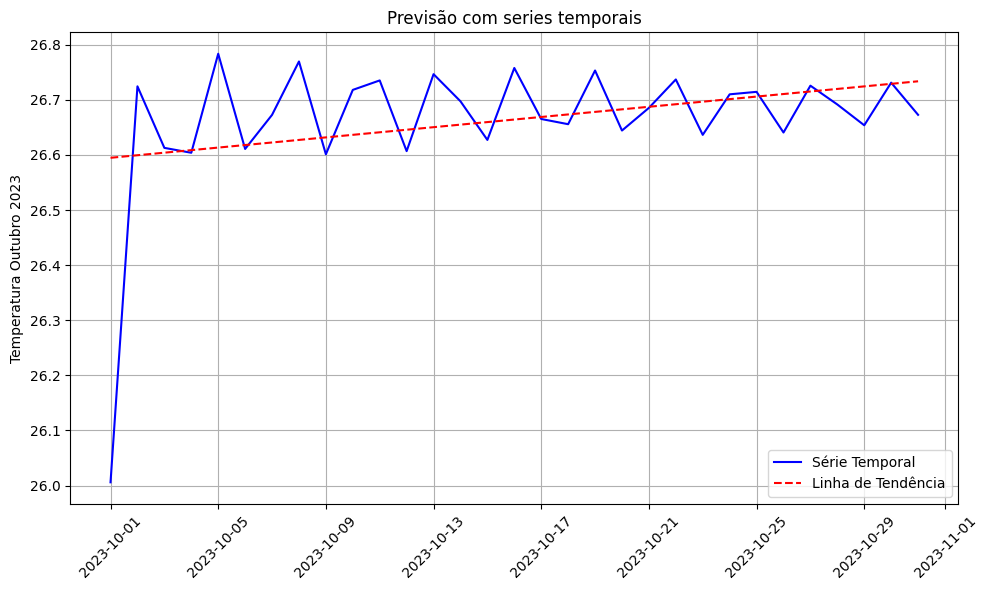

In [31]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Converter a coluna de números inteiros em formato de data
# sp['YEAR'] = pd.to_datetime(sp['YEAR'], format='%Y')

# Ajustar uma linha de tendência (regressão linear) aos dados
x = np.arange(len(df))
y = df['predicted_mean']
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)

# Plotar a série temporal
plt.plot(df['data'], df['predicted_mean'], label='Série Temporal', color='b')

# Plotar a linha de tendência
plt.plot(df['data'], trend_line(x), label='Linha de Tendência', color='r', linestyle='--')


# Configurar rótulos e título
plt.ylabel('Temperatura Outubro 2023')
plt.title('Previsão com series temporais')



# Mostrar a legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()